# 実践演習10-6

scikit-learnで回帰にアンサンブル学習を適用します。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.datasets import load_boston
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

bostonデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## バギング

In [3]:
reg1 = ensemble.BaggingRegressor()
reg1.fit(X, y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

評価

In [4]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(reg1, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.82 +/- 0.15 


In [5]:
cv2 = LeaveOneOut()
scores = cross_val_score(reg1, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-11.85


## ランダムフォレスト

In [6]:
reg2 = ensemble.RandomForestRegressor()
reg2.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

評価

In [7]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(reg2, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.89 +/- 0.03 


In [8]:
cv2 = LeaveOneOut()
scores = cross_val_score(reg2, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-12.35


## Adaブースト

In [9]:
reg3 = ensemble.AdaBoostRegressor()
reg3.fit(X,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

評価

In [10]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(reg3, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.81 +/- 0.06 


In [11]:
cv2 = LeaveOneOut()
scores = cross_val_score(reg3, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-13.53


## 勾配ブースティング

In [12]:
reg4 = ensemble.GradientBoostingRegressor()
reg4.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

評価

In [13]:
cv = ShuffleSplit(n_splits=10)
scores = cross_val_score(reg4, X, y, cv=cv, scoring='r2')
print("{0:4.2f} +/- {1:4.2f} ".format(scores.mean(), scores.std()))

0.89 +/- 0.05 


In [14]:
cv2 = LeaveOneOut()
scores = cross_val_score(reg4, X, y, cv=cv2, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-8.68


### 補足

特徴の重要性を確認するコード

Feature ranking:
1. CRIM (0.229704)
2. ZN (0.154837)
3. INDUS (0.149100)
4. CHAS (0.077989)
5. NOX (0.074987)
6. RM (0.069880)
7. AGE (0.066873)
8. DIS (0.058248)
9. RAD (0.050829)
10. TAX (0.042189)
11. PTRATIO (0.011502)
12. B (0.007960)
13. LSTAT (0.005903)


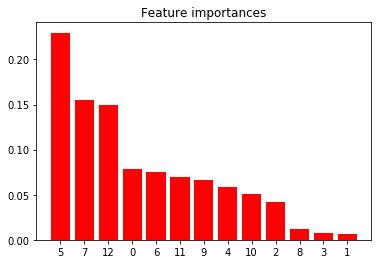

In [15]:
importances = reg4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, boston.feature_names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()